`<div class="alert alert-info"> 
<b>Комментарий студента:</b> 

Привет, Эльвира!👋

Большое спасибо за коментарии!

Ко мне можно обращаться на «ты».😊
</div>`

# Анализ А-В теста и приоритизация гипотез. Проверка гипотез для увеличения выручки интернет-магазина

- Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

--- 

- В ходе исследования необходимо:
  - Выделить приоритетные гипотезы для A/B-тестирований на этот год.
  - Проанализировать A/B-тест за август 2019 года и описать результаты.

**Описание данных:**

В нашем распоряжении три датасета. 

- В первом **/datasets/hypothesis.csv** 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

- Во втором **/datasets/orders.csv** данные по заказам по группам.

- В третьем **/datasets/visitors.csv** данные по посетителям по группам.

---

Структура ***datasets/hypothesis.csv:***

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

---

Структура ***datasets/orders.csv:***

- transactionId — идентификатор заказа;
- тvisitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

---

Структура ***datasets/visitors.csv:***

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

 **План работы:**

1. Загрузить данные о гипотезах, заказах и посетителях из CSV-файлов в переменные. Выполнить обзор данных и предобработку данных.

2. Приоритизация гипотез.

3. Анализ A/B-теста.

4. Написать общий вывод.

# 1. Загрузка данных и подготовка их к анализу

# Обзор данных

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
# загрузка данных

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# просмотр данных

for i in (hypothesis, orders, visitors):
    display(i.head())
    display(i.info())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

**Вывод:**

1. Необходимо изменить тип данных колоннок с датами на соответствующий datetime;

2. Названия столбцов привести к "snake_case".

# Предобработка данных

In [4]:
 # преобразование данных о времени
   
orders['date'] = pd.to_datetime(orders['date'])    
visitors['date'] = pd.to_datetime(visitors['date'])

In [5]:
for i in (hypothesis, orders, visitors):
    
    i.columns = i.columns.str.replace('Id', '_id') # приведение название столбцов к "snake_case"
    
    i.columns = [x.lower() for x in i.columns]

    display(i.isna().sum()) # проверка на пропуски
  
    print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m',i.duplicated().sum()) # проверка на явные дубликаты
  
    display(i.info()) # проверка результата

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

Количество дубликатов в таблице: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Количество дубликатов в таблице: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

date        0
group       0
visitors    0
dtype: int64

Количество дубликатов в таблице: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [6]:
# выведем даты начала и окончания теста

print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max()) 

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


В качестве дополнительного этапа подготовки данных, в связи с проведением A/B-теста, необходимо проверить данные на корректность их разбиения по группам. 

В группе А и группе Б не должно быть одних и тех же пользователей.

In [7]:
# получим список уникальных пользователей из группы А и В в orders

a_visitor_id = list(orders.loc[orders['group'] == 'A', 'visitor_id'].unique())

b_visitor_id = list(orders.loc[orders['group'] == 'B', 'visitor_id'].unique())

# найдем пересечение списков и сохраним его в отедельный список
a_b_id = list(set(a_visitor_id) & set(b_visitor_id))

# проверка сколько элементов списка получилось 

print('Количество уникальных пользователей в группе А = ', len(set(a_visitor_id))) 
print('Количество уникальных пользователей в группе В = ', len(set(b_visitor_id))) 
print('Количество общих пользователей для двух групп = ', len(set(a_b_id))) 

Количество уникальных пользователей в группе А =  503
Количество уникальных пользователей в группе В =  586
Количество общих пользователей для двух групп =  58


In [8]:
# удалим дубликаты из orders

duplicate = orders.groupby('visitor_id').agg({'group': 'nunique'}).query('group>1').reset_index()
orders = orders[~orders['visitor_id'].isin(duplicate['visitor_id'])]

In [9]:
# проверили, что дубликаты отсутсвуют

a_visitor_id = list(orders.loc[orders['group'] == 'A', 'visitor_id'].unique())

b_visitor_id = list(orders.loc[orders['group'] == 'B', 'visitor_id'].unique())

a_b_id = list(set(a_visitor_id) & set(b_visitor_id))

print('Количество общих пользователей для двух групп = ', len(set(a_b_id))) 

Количество общих пользователей для двух групп =  0


**Выводы по 1 разделу:**

Данные были изучены и подготовлены к дальнейшему исследованию:

- Была проведена проверка на пропуски, пропуски отсутствуют;

- Название столбцов приведено к "snake_case".

- Изменили тип данных колоннок с датами на соответствующий;

- Провели проверку на явные дубликаты - явных дубликатов не обнаружено;

- Из датасета orders удалили id покупателей, которые попали в обе группы теста.

# 2. Приоритизация гипотез

# Фреймворк ICE

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

Формула для расчета: ***impact * confidence / efforts***

In [10]:
pd.options.display.max_colwidth = 180

hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)

display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:**

Применив фреймворк ICE мы получили три наиболее перспективные для изучения гипотезы:

  - Запустить акцию, дающую скидку на товар в день рождения;
  - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
  - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

# Фреймворк RICE

RICE (R от англ. reach, «охват»)
Формула для расчета: ***reach * impact * confidence / efforts***

In [11]:
hypothesis['RICE'] = (hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts).round(2)

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**

Применив фреймворк RICE мы получили три наиболее перспективные для изучения гипотезы:

  - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
  - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
  - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

# Отличия результатов приоритизации гипотез при применении RICE вместо ICE

In [12]:
# посмотрим сводную таблицу

display(hypothesis)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


**Вывод:**

- приоритизация гипотез с использованием RICE вместо ICE поменяла порядок гипотез;  
- фактор, который повлиял на изменения приоритизации - Reach. Он измеряется количеством людей/событий за определенный период времени;
- соответственно более приоритетными стали гипотезы, изменения по которым затрагивают большее число пользователей.

**Выводы по 2 разделу:**

Применив фреймворк ICE мы получили три наиболее перспективные для изучения гипотезы:

  - Запустить акцию, дающую скидку на товар в день рождения;
  - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
  - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
  
---

Применив фреймворк RICE мы получили три наиболее перспективные для изучения гипотезы:

  - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
  - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
  - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
  
---

- приоритизация гипотез с использованием RICE вместо ICE поменяла порядок гипотез;  
- фактор, который повлиял на изменения приоритизации - Reach. Он измеряется количеством людей/событий за определенный период времени;
- соответственно более приоритетными стали гипотезы, изменения по которым затрагивают большее число пользователей.

---

Гипотезы, вошедшие первую тройку при применении как одного, так и другого фреймворка, являются:

 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;

- добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

# 3. Анализ A/B-теста

# График кумулятивной выручки по группам

In [13]:
# создаем массив уникальных пар значений дат и групп теста

datesGroups = orders[['date','group']].drop_duplicates()

In [14]:
# получаем агрегированные кумулятивные по дням данные о заказах 

ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
                                            orders['group'] == x['group'])]
     .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
     .sort_values(by=['date','group'])
)

In [15]:
# получаем агрегированные кумулятивные по дням данные о посетителях

visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                                             visitors['group'] == x['group'])]
     .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
     .sort_values(by=['date','group'])
)


In [16]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [17]:
# проверка корректности создания датафрейма cumulativeData

print('Дата начала теста:', cumulativeData['date'].min())
print('Дата окончания теста:', cumulativeData['date'].max()) 

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


- Дата начала и окончания теста совпадает с исходными данными, следовательно датафрейм cumulativeData создан корректно.

***Построим графики кумулятивной выручки по дням и группам A/B-тестирования***

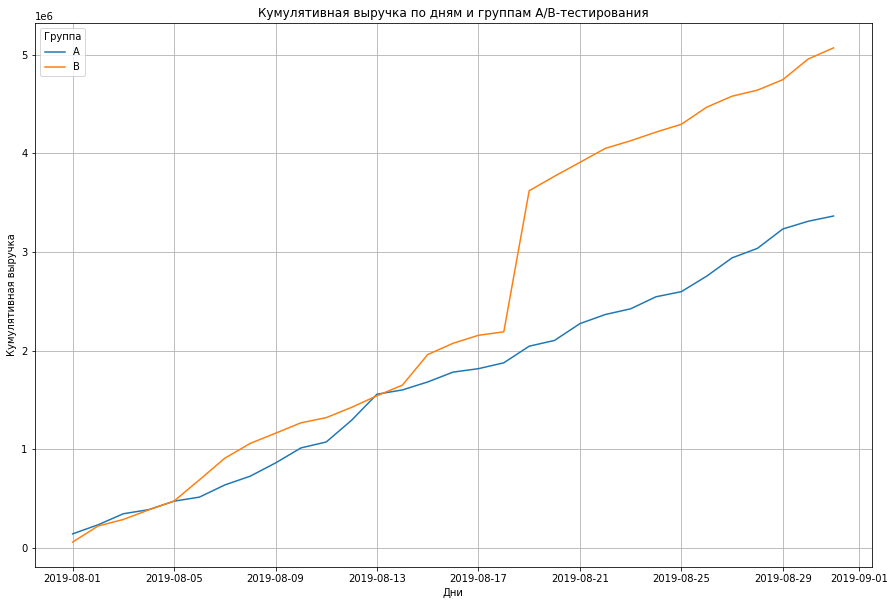

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 10))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid()
plt.xlabel('Дни')
plt.ylabel('Кумулятивная выручка')
plt.legend(title='Группа')
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования') 

plt.show()

**Вывод:**

- группа В лидирует на протяжении всего теста;

- 18-19 августа в группе В произошел резкий скачек. На это может быть две причины: либо в данные попал аномально дорогой заказ, либо в эти дни было много заказов. 

# График кумулятивного среднего чека по группам

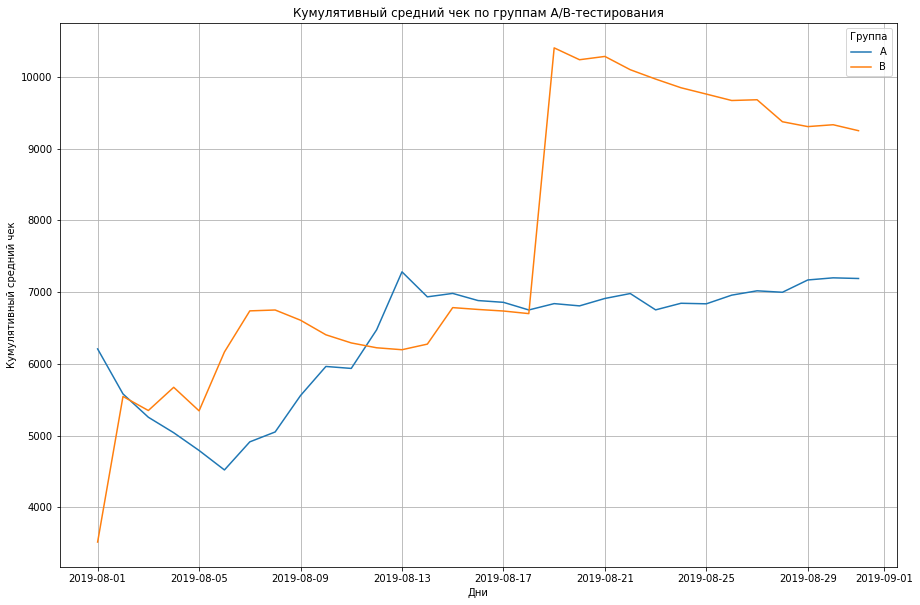

In [19]:
plt.figure(figsize=(15, 10))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid()
plt.xlabel('Дни')
plt.ylabel('Кумулятивный средний чек')
plt.legend(title='Группа')
plt.title('Кумулятивный средний чек по группам A/B-тестирования') 

plt.show()

**Вывод:**

- в первой половине теста графики ведут себя нестабильно;

- средний чек для группы B после 18 августа резко пошёл вверх. Для группы A такого резкого взлёта не было. Резкий взлет для B мог быть связан с крупными заказами;

- к концу тестирования у группы А есть тенденция к росту, а у группы В к снижению.

# График относительного изменения кумулятивного среднего чека группы B к группе A

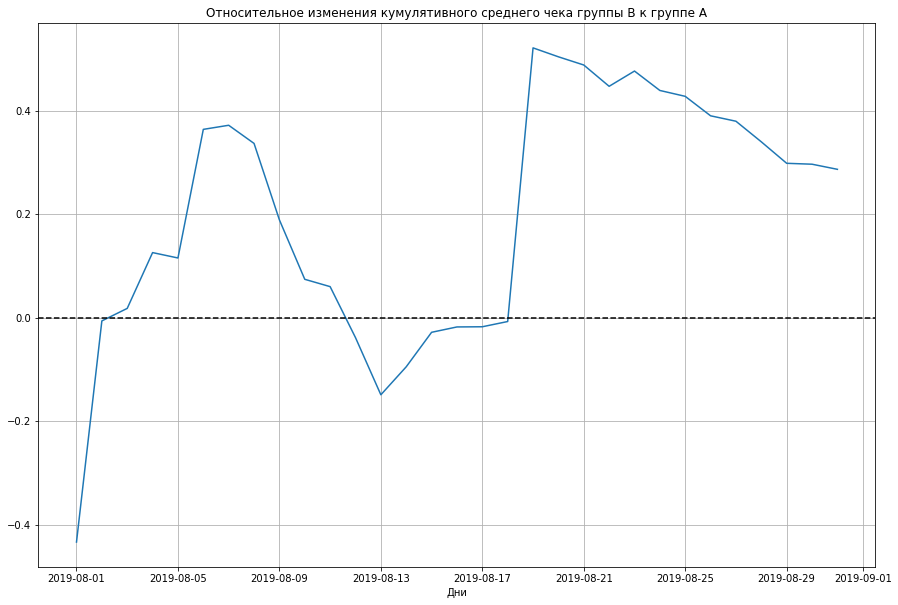

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


# cтроим отношение средних чеков
plt.figure(figsize=(15, 10))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дни')
plt.title('Относительное изменения кумулятивного среднего чека группы B к группе A')  

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Вывод:**

- Резкий скачок после 18 августа для группы В сохранился, значит действительно имеет место аномально крупный заказ.

# График кумулятивного среднего количества заказов на посетителя по группам

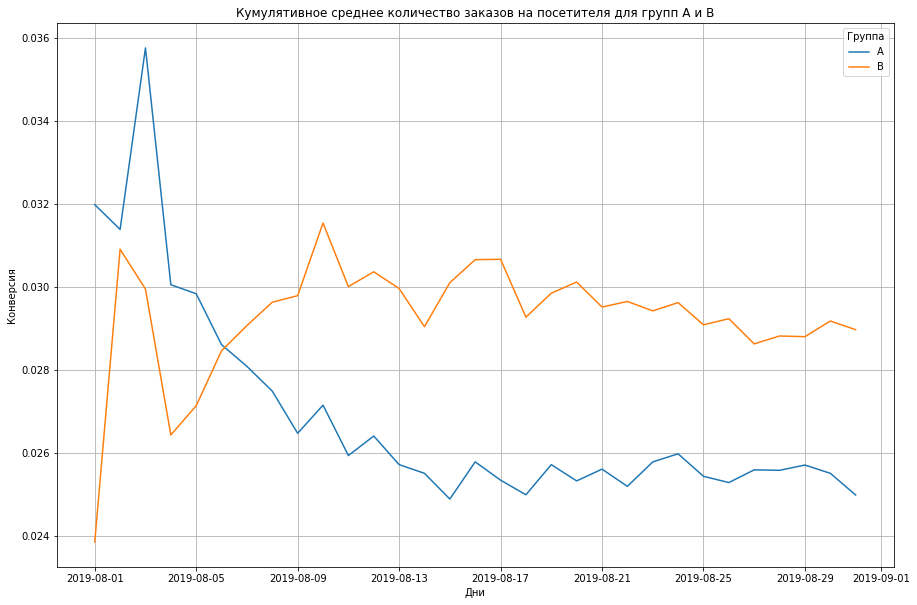

In [21]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим график
plt.figure(figsize=(15, 10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.grid()
plt.legend(title='Группа')
plt.title('Кумулятивное среднее количество заказов на посетителя для групп A и B')  
plt.xlabel('Дни')
plt.ylabel('Конверсия')

plt.show()

**Вывод:**

- В первые дни наблюдается колебание конверсии, и группа А лидирует по сравнению с группой В;

- В последующие дни группа В вырывается вперед и стабилизируется, группа А просела и так же стабилизировалась.

# График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

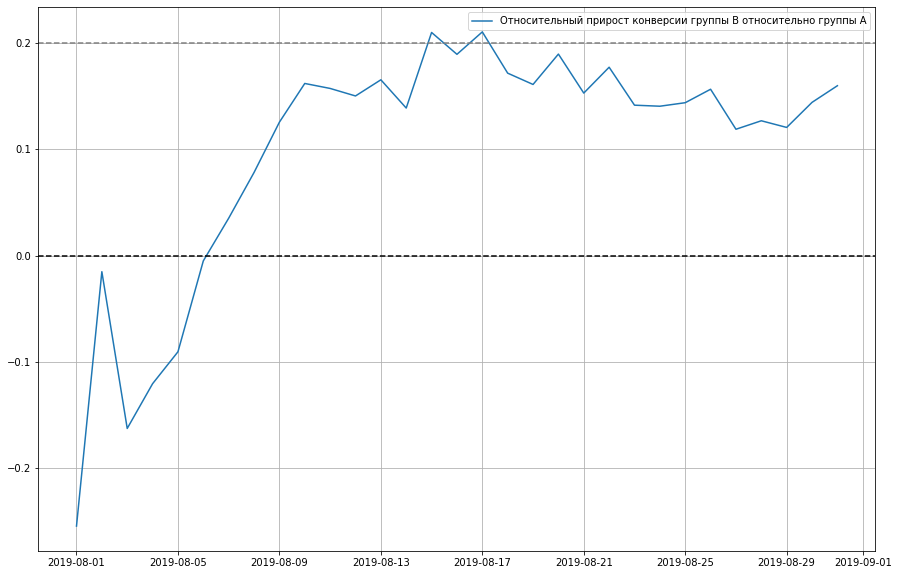

In [22]:

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим график
plt.figure(figsize=(15, 10))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()

**Вывод:**

- В первые дни конверсия группы В была нестабильной и проигрывала группе А;

- Начиная с 6 дня теста группа В вырывается вперед: прирост по сравнению с группой А превышает 20 %, затем немного снижается и к концу теста стабилизируется в районе 15 %.

# Точечный график количества заказов по пользователям

In [23]:
# подсчитаем количество заказов по пользователям 

ordersByUsers = (
     orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


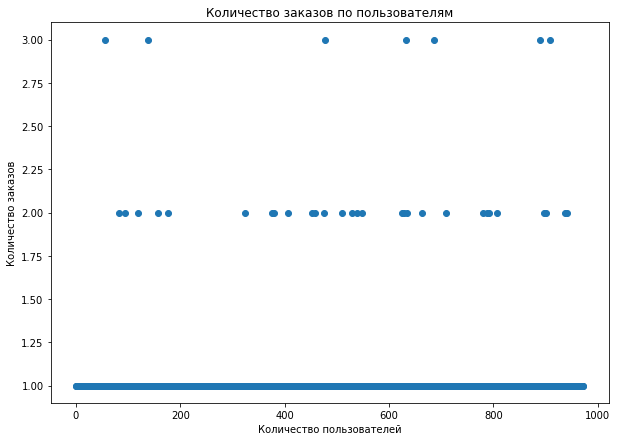

In [24]:
# Построим точечную диаграмму числа заказов на одного пользователя

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10, 7))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')

plt.title('Количество заказов по пользователям')  
plt.show()

**Вывод:**

- Большее количество пользователей сделали 1 заказ;

- Два заказа сделали намного меньше пользователей;

- Три заказа - всего семь пользователей. Необходимо убедится, что это не выбросы.

# 95-й и 99-й перцентили количества заказов на пользователя.

In [25]:
# посчитаем выборочные перцентили количества заказов на одного пользователя

np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Вывод:**

- не более 5 % пользователей сделали заказ более 1 раза;

- и не более 1 % пользователей сделали заказ более 2 раз;

- значит заказы, совершенные более 2 раз на пользователя, будем считать выбросами.

# Точечный график стоимостей заказов

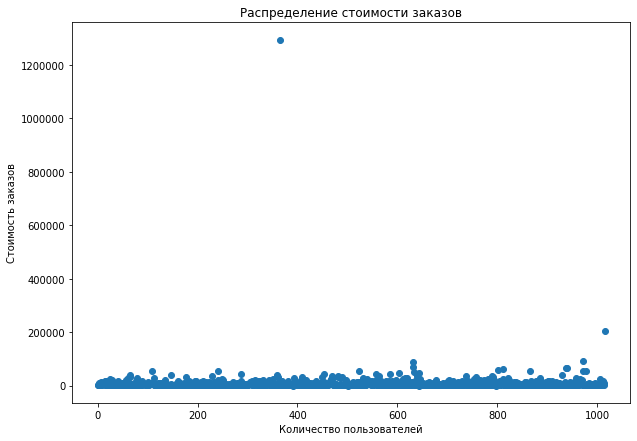

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.ticklabel_format(style='plain')

plt.title('Распределение стоимости заказов')  
plt.show()

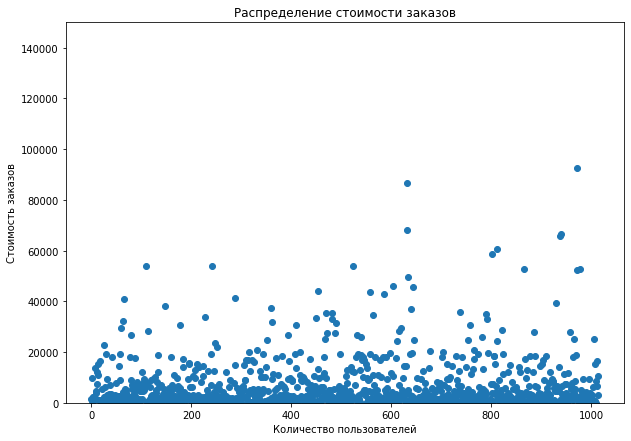

In [27]:
# построим график с ограничением стоимости заказа до 150 000

plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')

plt.ticklabel_format(style='plain')
plt.ylim(0, 150000) 
plt.title('Распределение стоимости заказов')  
plt.show()

**Вывод:**

- на первом графике есть выбросы: заказ стоимостью 200 000 и 1 200 000;

- на втором графике видно, что основная масса заказов находится в диапазоне до 20 000.

# 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов

In [28]:
# посчитаем выборочные перцентили стоимости заказов

np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод:**

- не более 5 % пользователей сделали заказ на сумму более 26785;

- и не более 1 % пользователей сделали заказ на сумму более 53904;

- примем значение аномальных заказов стоимостью выше 53904.

# Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [29]:
# Посчитаем статистическую значимость различия в среднем количестве заказов между группами

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 



sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)



print('Значение P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


print('Разница между группами В и А:',"{0:.3f}".format((sampleB.mean()/sampleA.mean()-1)))


                                 

Значение P-value: 0.011
Разница между группами В и А: 0.160


**Вывод:**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.

- Различия в среднем количестве заказов на посетителя между группами есть;

- Среднее количество заказов на посетителя в группе В выше на 16 %.

# Подсчет статистической значимоси различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы. 

- **Нулевая гипотеза:** : различий в среднем чеке заказа между группами нет. 

- **Альтернативная гипотеза:** различия в среднем чеке заказа между группами есть.

In [30]:
print('Значение P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('Разница между группами В и А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение P-value: 0.829
Разница между группами В и А: 0.287


**Вывод:**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.

- Различий в среднем чеке заказа между группами нет;

- Однако разница среднего чека группы В к А равна 28,7 %.

# Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

- Примем значение аномальных заказов стоимостью выше 53904 и покупками более 2 раз;

- Узнаем сколько всего аномальных пользователей.

In [31]:
# Определение 99-го перцентиля по количеству заказов
orders_percentile = np.percentile(ordersByUsers['orders'], 99)

# Выбор пользователей с количеством заказов выше 99-го перцентиля
usersWithManyOrders = pd.concat([
  ordersByUsersA[ordersByUsersA['orders'] > orders_percentile],
  ordersByUsersB[ordersByUsersB['orders'] > orders_percentile]
], axis=0)

# Определение 99-го перцентиля по выручке
revenue_percentile = np.percentile(orders['revenue'], 99)

# Выбор пользователей с дорогой покупкой
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_percentile]

# Объединение и удаление дубликатов
abnormalUsers = (
  pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
  .drop_duplicates()
  .sort_values(by='visitor_id')
)

display(abnormalUsers.head())
print()
print('Количество аномальных пользователей:',abnormalUsers.shape[0])

,visitor_id,orders,transaction_id,date,revenue,group
1099,148427295,NaN,3.169240e+08,2019-08-12,65710.0,A
33,249864742,3.0,NaN,NaT,NaN,NaN
58,611059232,3.0,NaN,NaT,NaN,NaN
949,887908475,NaN,1.347999e+09,2019-08-21,60450.0,A
744,888512513,NaN,3.668308e+09,2019-08-27,86620.0,B



Количество аномальных пользователей: 16


- Всего 16 пользователей, совершивших покупку дороже 53904 и более 2 раз.

In [32]:
# отфильтруем данные по аномальным пользователям

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# посчитаем по чистым данным

print('Значение P-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Разница между группами В и А:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение P-value: 0.011
Разница между группами В и А: 0.160


**Вывод:**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.

- Различия в среднем количестве заказов на посетителя между группами есть;

- Среднее количество заказов на посетителя в группе В выше на 16,0 %.

# Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [33]:
print('Значение P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Разница между группами B и А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение P-value: 0.829
Разница между группами B и А: 0.287


**Вывод:**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.

- Различий в среднем чеке заказа между группами нет;

- Разница среднего чека группы В больше среднего чека группы А на 28,7 %.

# Решение по результатам теста

***По результатам теста можно принять одно из вариантов решений:***

- остановить тест, зафиксировать победу одной из групп;

- остановить тест, зафиксировать отсутствие различий между группами;

- продолжить тест.

---

***Результаты тестирования***

1. Среднее количество заказов на посетителя между группами:

   - есть статистически значимые различия в среднем количестве заказов на посетителя между группами по «сырым» и отфильтрованным данным;
   - группа В лидирует в обоих случаях.
   
   
2. Различие в среднем чеке заказа между группами:

    - нет статистически значимого различия в среднем чеке заказа между группами по «сырым» и отфильтрованным данным.
    
    
---

***Решение по результатам теста***

**Остановить тест, зафиксировать победу группы В.**

- Хотя тест не выявил статистически значимых различий в среднем чеке, увеличение количества заказов, даже с сохранением текущего среднего чека, потенциально приведет к значительному росту выручки. 


**Выводы по 3 разделу:**

- Построен график кумулятивной выручки по группам:
  
   - группа В лидирует на протяжении всего теста;

    - 18-19 августа в группе В произошел резкий скачек. На это может быть две причины: либо в данные попал аномально дорогой заказ, либо в эти дни было много заказов.
    
---
- Построен график кумулятивного среднего чека по группам:

    - в первой половине теста графики ведут себя нестабильно;

    - средний чек для группы B после 18 августа резко пошёл вверх. Для группы A такого резкого взлёта не было. Резкий взлет для B мог быть связан с крупными заказами;

    - к концу тестирования у группы А есть тенденция к росту, а у группы В к снижению.
    
---
- Построен график относительного изменения кумулятивного среднего чека группы B к группе A:

    - Резкий скачок после 18 августа для группы В сохранился, значит действительно имеет место аномально крупный заказ.
    
---
- Построен график кумулятивного среднего количества заказов на посетителя по группам:

   - В первые дни наблюдается колебание конверсии, и группа А лидирует по сравнению с группой В;

    - В последующие дни группа В вырывается вперед и стабилизируется, группа А просела и так же стабилизировалась.
    
---
- Построен график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

    - В первые дни конверсия группы В была нестабильной и проигрывала группе А;

    - Начиная с 6 дня теста группа В вырывается вперед: прирост по сравнению с группой А превышает 20 %, затем немного снижается и к концу теста стабилизируется в районе 15 %.
    
--- 
- Построен точечный график количества заказов по пользователям:

    - Большее количество пользователей сделали 1 заказ;

    - Два заказа сделали намного меньше пользователей;

    - Три заказа - всего семь пользователей. 
    
---
- Расчитан 95-й и 99-й перцентили количества заказов на пользователя:

    - не более 5 % пользователей сделали заказ более 1 раза;

    - и не более 1 % пользователей сделали заказ более 2 раз;

    - значит заказы, совершенные более 2 раз на пользователя, будем считать выбросами.
    
---
- Построен точечный график стоимостей заказов:

    - на первом графике есть выбросы: заказ стоимостью 200 000 и 1 200 000;

    - на втором графике видно, что основная масса заказов находится в диапазоне до 20 000.
    
---
- Расчитан 95-й и 99-й перцентили стоимости заказов. Выбрана граница для определения аномальных заказов:

    - не более 5 % пользователей сделали заказ на сумму более 26785;

    - и не более 1 % пользователей сделали заказ на сумму более 53904;

    - примем значение аномальных заказов стоимостью выше 53904.
    
---
- Посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:

   - На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.

    - Различия в среднем количестве заказов на посетителя между группами есть;

    - Среднее количество заказов на посетителя в группе В выше на 16 %.
    
---
- Посчитана статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным:

    - На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.

    - Различий в среднем чеке заказа между группами нет;

    - Однако разница среднего чека группы В к А равна 28,7 %.
    
---
- Посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:

    - На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.

    - Различия в среднем количестве заказов на посетителя между группами есть;

    - Среднее количество заказов на посетителя в группе В выше на 16,0 %.
    
---
- Посчитана статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным:

    - На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.

    - Различий в среднем чеке заказа между группами нет;

    - Разница среднего чека группы В больше среднего чека группы А на 28,7 %.
    
---
- Принято решение по результатам теста:

    - Остановить тест, зафиксировать победу группы В.

    - Хотя тест не выявил статистически значимых различий в среднем чеке, увеличение количества заказов, даже с сохранением текущего среднего чека, потенциально приведет к значительному росту выручки.

# Общий вывод

**В ходе анализ А-В теста и приоритизации гипотез для увеличения выручки интернет-магазина были выполнены следующие этапы и сделаны выводы:**

--- 
**Загрузка данных и подготовка их к анализу:**

- Данные были изучены и подготовлены к дальнейшему исследованию:

- Была проведена проверка на пропуски, пропуски отсутствуют;

- Название столбцов приведено к "snake_case".

- Изменили тип данных колоннок с датами на соответствующий;

- Провели проверку на явные дубликаты - явных дубликатов не обнаружено;

- Из датасета orders удалили id покупателей, которые попали в обе группы теста.

---
**Приоритизация гипотез:**

Топ-гипотез для последующих экспериментов:

- добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

---

**Анализ результатов A/B-теста:**

- По среднему количеству заказов группа В теста показала лучший результат, чем группа А. 

- Тест можно признать успешным. 